In [4]:
from sklearn.datasets import fetch_lfw_people

# 加载数据集
faces = fetch_lfw_people(min_faces_per_person=60)
faces.target_names, faces.images.shape

(array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
        'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
        'Tony Blair'], dtype='<U17'),
 (1348, 62, 47))

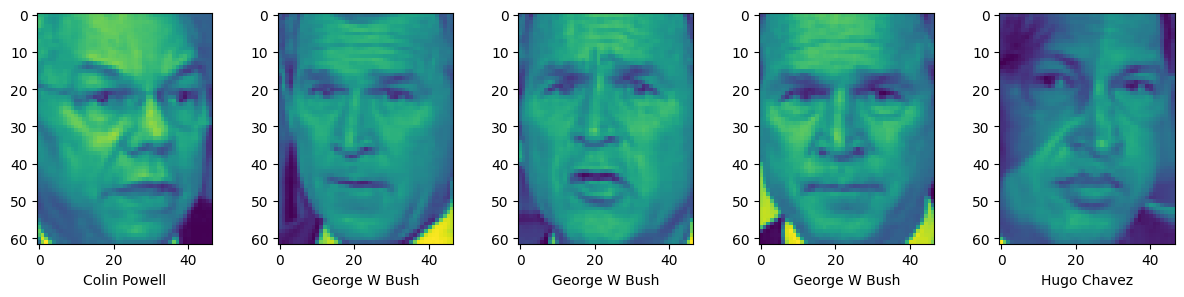

In [20]:
from matplotlib import pyplot as plt

%matplotlib inline

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, image in enumerate(faces.images[:5]):
    axes[i].imshow(image)
    axes[i].set_xlabel(faces.target_names[faces.target[i]])
    
# for i in count:
#     axe = axes[i]
#     data = faces.data[i]
#     name = faces.target_names[faces.target[i]]
#     columnCount = 62
#     rowCount = 47
#     column = range(columnCount)
#     row = range(rowCount)
#     for r in row:
#         for c in column:
#             position = r * columnCount + c
#             value = data[position]

In [21]:
from sklearn.decomposition import PCA

# 直接运行，将数据特征缩减为 150 个
pca = PCA(n_components=150, whiten=True, random_state=42)
pca_data = pca.fit_transform(faces.data)
pca_data.shape

(1348, 150)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    pca_data, faces.target, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1078, 150), (270, 150), (1078,), (270,))

In [29]:
import numpy as np
from sklearn.svm import SVC

model = SVC(C=10,gamma=0.001)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8296296296296296

In [27]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.8296296296296296